In [390]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
%matplotlib inline

In [391]:
ls

01-Stu_Predict_Gentrification/     Starter_Code (2).zip
01-Stu_Predict_Gentrification 2/   Starter_Code (3).zip
01-Stu_Predict_Gentrification 3/   Starter_Code (4).zip
1.3_excel_visuals_unsolved.xlsx    Starter_Code (5).zip
3.1_lecture.ipynb                  Starter_Code (6).zip
61zlev                             Starter_Code (7).zip
Class_1_Activities.zip             Starter_Code (8).zip
Crowdfunding_data.csv              Starter_Code (9).zip
DataOne.csv                        Starter_Code 10/
GitHubDesktop-x64.zip              Starter_Code 11/
IMG_9278 2.JPG                     Starter_Code 12/
IMG_9278.JPG                       Starter_Code 13/
IMG_9279.JPG                       Starter_Code 14/
IMG_9280.JPG                       Starter_Code 15/
IMG_9281.JPG                       Starter_Code 2/
IMG_9282.JPG                       Starter_Code 3/
IMG_9283.JPG                       Starter_Code 4/
IMG_9284.JPG                       Starter_Code 5/
IMG_9285 2.JPG                     S

In [392]:
mouse_metadata = pd.read_csv("Starter_Code 15/Pymaceuticals/data/Mouse_metadata.csv")
study_results = pd.read_csv("Starter_Code 15/Pymaceuticals/data/Study_results.csv")

In [393]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [394]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [395]:
pyma_study_results = pd.merge(mouse_metadata,study_results, how = "outer", on = "Mouse ID")

In [396]:
df = pyma_study_results
pyma_study_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [397]:
pyma_study_results.shape[0]

1893

In [398]:
dup_miceid = df.loc[df.duplicated(subset = ['Mouse ID','Timepoint']),'Mouse ID'].unique()
dup_miceid


array(['g989'], dtype=object)

In [399]:
clean_pyma_results = pyma_study_results[pyma_study_results['Mouse ID'].isin(dup_miceid)==False]
clean_pyma_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [400]:
clean_pyma_results["Mouse ID"].nunique()

248

# Summary Statistics

In [401]:
mean_tumor_vol = clean_pyma_results.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
mean_tumor_vol

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [402]:
median_tumor_vol = clean_pyma_results.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
median_tumor_vol

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [403]:
variance_tumor_vol = clean_pyma_results.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
variance_tumor_vol

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [404]:
stdev_tumor_vol = clean_pyma_results.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
stdev_tumor_vol

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [405]:
sem_tumor_vol = clean_pyma_results.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
sem_tumor_vol

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [406]:
# Dataframe of drug vs tumor volume
drug_vs_tumor_vol = pd.DataFrame({
    "Mean Tumor Volume" : mean_tumor_vol,
    "Median Tumor Volume" : median_tumor_vol,
    "Tumor Volume Variance" : variance_tumor_vol,
    "Tumor Volume Std. Dev." : stdev_tumor_vol, 
    "Tumor Volume Std. Err." : sem_tumor_vol})
drug_vs_tumor_vol

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


 # Bar Charts and Pie Charts

In [407]:
drug_regimen_vs_timepoint_df = clean_pyma_results["Drug Regimen"].value_counts()

In [408]:
df2 = drug_regimen_vs_timepoint_df

In [409]:
df2

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

Text(0.5, 1.0, 'Number of Mice per Treatment')

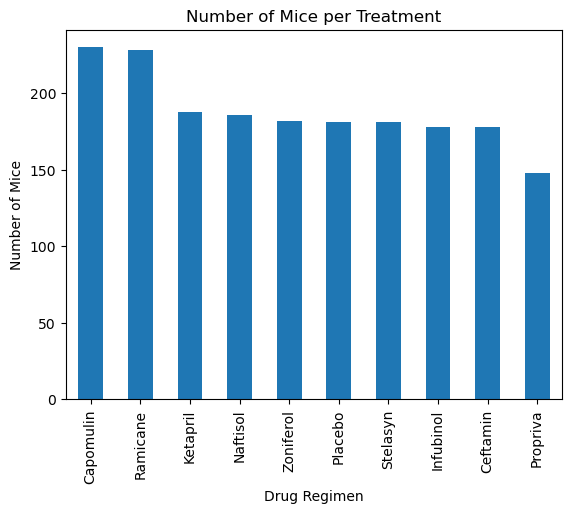

In [410]:
# bar graph using pandas
pandas_graph = df2.plot.bar(x = "Drug Regimen", y = "Timepoint")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")

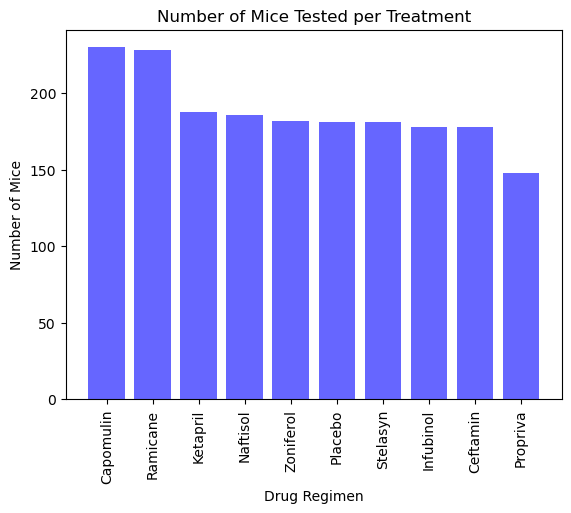

In [411]:
#bar graph using pyplot
x_axis = df2.index.values
y_axis = df2.values

plt.bar(x_axis, y_axis, color = 'b', alpha = 0.6, align = 'center')
plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation = "vertical")

plt.show()

In [412]:
#extract # of males and female mice from clean dataframe, create df3
male_female_mice_df = clean_pyma_results["Sex"].value_counts()
df3 = male_female_mice_df
df3

Male      958
Female    922
Name: Sex, dtype: int64

<Axes: ylabel='Sex'>

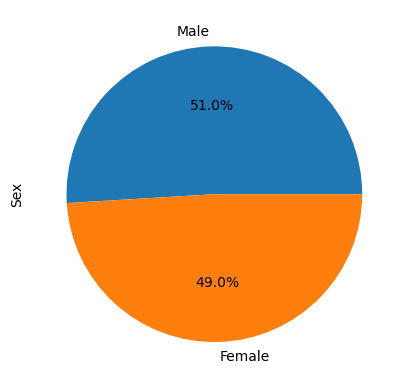

In [413]:
#create pie chart using pandas
panda_pie = df3.plot(kind='pie',autopct='%1.1f%%')
panda_pie



Text(0.5, 1.0, 'Sex')

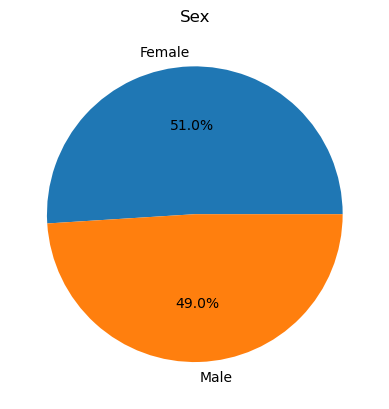

In [414]:
#create pie chart using pyplot
labels = ["Female","Male"]
sizes = [51,49]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.set_title("Sex")

# Quartiles, Outliers, and Box Plot

In [415]:
df2

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

In [416]:
#Calculate the final tumor volume of each mouse across four of 
#the most promising treatment regimens
 
#filter drugs
capomulin = clean_pyma_results.loc[clean_pyma_results["Drug Regimen"]== "Capomulin", :]
ramican = clean_pyma_results.loc[clean_pyma_results["Drug Regimen"]== "Ramicane", :]
infubinol = clean_pyma_results.loc[clean_pyma_results["Drug Regimen"]== "Infubinol", :]
ceftamin = clean_pyma_results.loc[clean_pyma_results["Drug Regimen"]== "Ceftamin", :]


In [417]:
# greatest timepoint for mice 
capomulin_last = capomulin.groupby('Mouse ID').max()['Timepoint']
ramican_last = ramican.groupby('Mouse ID').max()['Timepoint']
infubinol_last = infubinol.groupby('Mouse ID').max()['Timepoint']
ceftamin_last = ceftamin.groupby('Mouse ID').max()['Timepoint']


In [418]:
#tumor volume 
capomulin_tumor_vol = pd.DataFrame(capomulin_last)
ramican_tumor_vol = pd.DataFrame(ramican_last)
infubinol_tumor_vol = pd.DataFrame(infubinol_last)
ceftamin_tumor_vol = pd.DataFrame(ceftamin_last)

In [419]:
# merge data 
capomulin_merge = pd.merge(capomulin_tumor_vol,clean_pyma_results, on = ("Mouse ID", "Timepoint"), how = "left")
ramican_merge = pd.merge(ramican_tumor_vol,clean_pyma_results, on = ("Mouse ID", "Timepoint"), how = "left")
infubinol_merge = pd.merge(infubinol_tumor_vol,clean_pyma_results, on = ("Mouse ID", "Timepoint"), how = "left")
ceftamin_merge = pd.merge(ceftamin_tumor_vol,clean_pyma_results, on = ("Mouse ID", "Timepoint"), how = "left")

In [420]:
capomulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [421]:
#find quartiles for capomulin

capomulin_tumors = capomulin_merge["Tumor Volume (mm3)"]

capomulin_quartiles = capomulin_tumors.quantile([.25,.5,.75])
capomulin_lower_quart = capomulin_quartiles[.25]
capomulin_upper_quart = capomulin_quartiles[.75]
capomulin_interquart = capomulin_upper_quart - capomulin_lower_quart

#find upper and lower bounds 

capomulin_upper_bound = capomulin_upper_quart + (1.5*capomulin_interquart)
capomulin_lower_bound = capomulin_lower_quart - (1.5*capomulin_interquart)

In [422]:
# capomulin quartiles
print (capomulin_quartiles)

0.25    32.377357
0.50    38.125164
0.75    40.159220
Name: Tumor Volume (mm3), dtype: float64


In [423]:
# capomulin upper quartile
print (capomulin_upper_quart)

40.1592203


In [424]:
#capomulin lower quartile
print (capomulin_lower_quart)

32.37735684


In [425]:
#capomulin inter-quartile 
print (capomulin_interquart)

7.781863460000004


In [426]:
ramican_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [427]:
#find quartiles for ramican

ramican_tumors = ramican_merge["Tumor Volume (mm3)"]

ramican_quartiles = ramican_tumors.quantile([.25,.5,.75])
ramican_lower_quart = ramican_quartiles[.25]
ramican_upper_quart = ramican_quartiles[.75]
ramican_interquart = ramican_upper_quart - ramican_lower_quart

#find upper and lower bounds 

ramican_upper_bound = ramican_upper_quart + (1.5*ramican_interquart)
ramican_lower_bound = ramican_lower_quart - (1.5*ramican_interquart)

In [428]:
#ramican quartiles
print (ramican_quartiles)

0.25    31.560470
0.50    36.561652
0.75    40.659006
Name: Tumor Volume (mm3), dtype: float64


In [429]:
#ramican upper quartile
print (ramican_upper_quart)

40.65900627


In [430]:
#ramican lower quartile
print (ramican_lower_quart)

31.56046955


In [431]:
#ramican inter-quartile 
print (ramican_interquart)

9.098536719999998


In [432]:
infubinol.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1


In [433]:
#find quartiles for infubinol

infubinol_tumors = infubinol_merge["Tumor Volume (mm3)"]

infubinol_quartiles = infubinol_tumors.quantile([.25,.5,.75])
infubinol_lower_quart = infubinol_quartiles[.25]
infubinol_upper_quart = infubinol_quartiles[.75]
infubinol_interquart = infubinol_upper_quart - infubinol_lower_quart

#find upper and lower bounds 

infubinol_upper_bound = infubinol_upper_quart + (1.5*infubinol_interquart)
infubinol_lower_bound = infubinol_lower_quart - (1.5*infubinol_interquart)

In [434]:
#infubinol quartiles
print (infubinol_quartiles)

0.25    54.048608
0.50    60.165180
0.75    65.525743
Name: Tumor Volume (mm3), dtype: float64


In [435]:
#infubinol upper quartile
print (infubinol_upper_quart)

65.52574285


In [436]:
#infubinol lower quartile
print (infubinol_lower_quart)

54.04860769


In [437]:
#infubinol inter-quartile 
print (infubinol_interquart)

11.477135160000003


In [438]:
ceftamin.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
484,a275,Ceftamin,Female,20,28,0,45.000000,0
485,a275,Ceftamin,Female,20,28,5,46.795257,0
486,a275,Ceftamin,Female,20,28,10,47.371343,0
487,a275,Ceftamin,Female,20,28,15,49.734404,0
488,a275,Ceftamin,Female,20,28,20,50.513437,1


In [439]:
#find quartiles for ceftamin

ceftamin_tumors = ceftamin_merge["Tumor Volume (mm3)"]

ceftamin_quartiles = ceftamin_tumors.quantile([.25,.5,.75])
ceftamin_lower_quart = ceftamin_quartiles[.25]
ceftamin_upper_quart = ceftamin_quartiles[.75]
ceftamin_interquart = ceftamin_upper_quart - ceftamin_lower_quart

#find upper and lower bounds 

ceftamin_upper_bound = ceftamin_upper_quart + (1.5*ceftamin_interquart)
ceftamin_lower_bound = ceftamin_lower_quart - (1.5*ceftamin_interquart)

In [440]:
#ceftamin quartiles
print (ceftamin_quartiles)

0.25    48.722078
0.50    59.851956
0.75    64.299830
Name: Tumor Volume (mm3), dtype: float64


In [441]:
#ceftamin upper quartile
print (ceftamin_upper_quart)

64.29983003


In [442]:
#ceftamin lower quartile
print (ceftamin_lower_quart)

48.72207785


In [443]:
#ceftamin inter-quartile 
print (ceftamin_interquart)

15.577752179999997


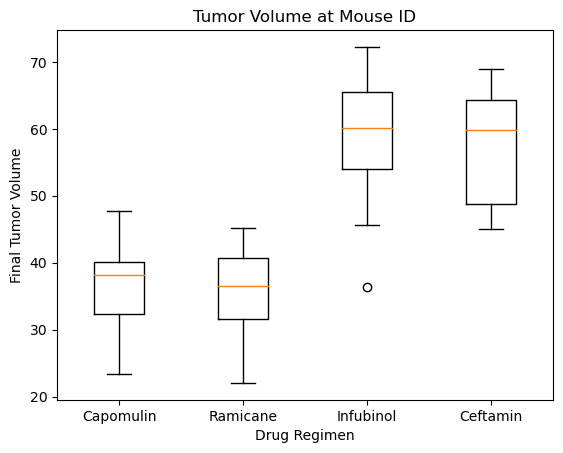

In [444]:
#creat box plot 
data = [capomulin_tumors, ramican_tumors, infubinol_tumors, ceftamin_tumors]
Regimens = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume at Mouse ID')
ax1.set_ylabel('Final Tumor Volume')    
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(data, labels=Regimens, widths = .4, vert=True)
plt.show()

# Line and Scatter Plots 

In [445]:
line_graph_df = capomulin.loc[capomulin["Mouse ID"]=="b128",:]
line_graph_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0


Text(0, 0.5, 'Tumor Volume (mm3)')

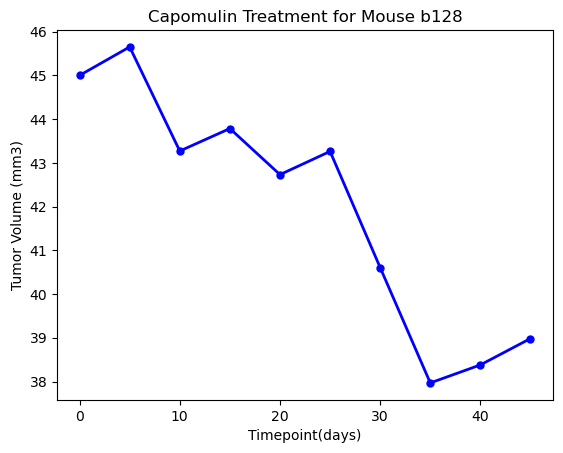

In [446]:
#create line graph
x_axis = line_graph_df["Timepoint"]
tumsiz = line_graph_df["Tumor Volume (mm3)"]

fig1, axq = plt.subplots()
plt.title("Capomulin Treatment for Mouse b128")
plt.plot(x_axis, tumsiz, linewidth = 2, markersize= 5, marker="o", color="blue", label = "Fahrenheit")
plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume (mm3)')

/var/folders/yv/r82gzwwj0c75wks150gxxmsm0000gn/T/ipykernel_62584/3785709286.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_capomulin_tumor_vol = capomulin.groupby(['Mouse ID']).mean()


Text(0, 0.5, 'Average Tumor Volume (mm3)')

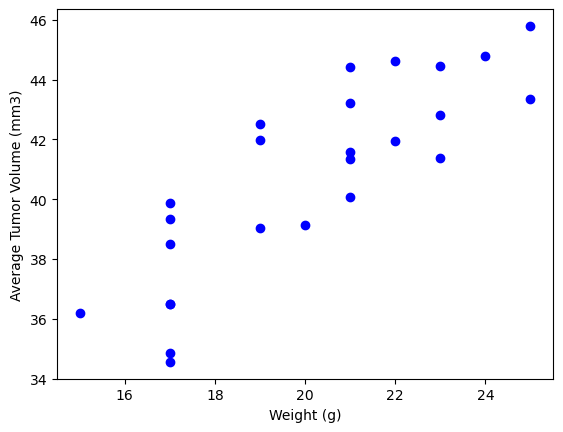

In [447]:
# create scatter plot 
fig1, ax1= plt.subplots()
avg_capomulin_tumor_vol = capomulin.groupby(['Mouse ID']).mean()

marker_size = 10
plt.scatter(avg_capomulin_tumor_vol['Weight (g)'], avg_capomulin_tumor_vol['Tumor Volume (mm3)'], color = "blue")
plt.xlabel('Weight (g)',fontsize = 10)
plt.ylabel('Average Tumor Volume (mm3)')

# Correlation and Regression

In [451]:
# calculate correlation 
correlation = st.pearsonr(avg_capomulin_tumor_vol['Weight (g)'], avg_capomulin_tumor_vol['Tumor Volume (mm3)'])
correlation 

PearsonRResult(statistic=0.841936342469472, pvalue=1.3225722434712483e-07)

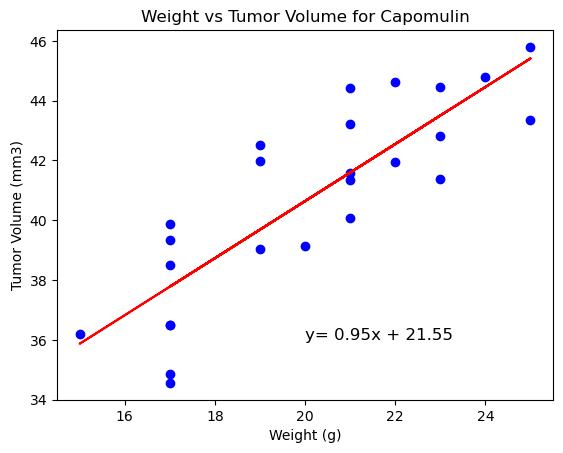

In [455]:
# create linear regression and line plot 
(slope, intercept, rvalue, pvalue, sterr) = linregress(avg_capomulin_tumor_vol["Weight (g)"], avg_capomulin_tumor_vol["Tumor Volume (mm3)"])
regression_values = avg_capomulin_tumor_vol["Weight (g)"]*slope+intercept
line_equation = f"y= {round(slope,2)}x + {round(intercept,2)}"

plt.scatter(avg_capomulin_tumor_vol["Weight (g)"], avg_capomulin_tumor_vol["Tumor Volume (mm3)"],color = 'b')
plt.plot(avg_capomulin_tumor_vol["Weight (g)"], regression_values, color="red")
plt.annotate(line_equation,(20,36), fontsize=12)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()